## Comparison (by country) of GDP and Percent of Energy from Renewables

### GDP Analysis

In [67]:
import pandas as pd 

df = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/gdp/gdp_usd.csv')
df_melt = pd.melt(df, id_vars=['CountryID','Country'], var_name='Year')
df_melt.dropna(inplace=True)
df_melt.head(2)

,CountryID,Country,Year,value
0,4,Afghanistan,1970,155
1,8,Albania,1970,"1,053"


In [68]:
df_melt['GDP'] = df_melt['value'].str.replace(',', '')
df_melt['Year'] = df_melt['Year'].astype(int)
df_melt

,CountryID,Country,Year,value,GDP
0,4,Afghanistan,1970,155,155
1,8,Albania,1970,"1,053",1053
2,12,Algeria,1970,356,356
3,20,Andorra,1970,"4,098",4098
4,24,Angola,1970,646,646
...,...,...,...,...,...
10992,704,Viet Nam,2019,"2,715",2715
10993,887,Yemen,2019,855,855
10997,894,Zambia,2019,"1,292",1292
10998,836,Zanzibar,2019,"1,111",1111


In [69]:
df_gdp = df_melt[df_melt['Year'] == 2018]
df_gdp.drop(columns=['value'], inplace=True)
df_gdp

,CountryID,Country,Year,GDP
10560,4,Afghanistan,2018,484
10561,8,Albania,2018,5254
10562,12,Algeria,2018,4154
10563,20,Andorra,2018,41794
10564,24,Angola,2018,3290
...,...,...,...,...
10772,704,Viet Nam,2018,2566
10773,887,Yemen,2018,804
10777,894,Zambia,2018,1556
10778,836,Zanzibar,2018,1026


In [70]:
df_gdp = df_gdp[['Country', 'GDP']]
df_gdp

,Country,GDP
10560,Afghanistan,484
10561,Albania,5254
10562,Algeria,4154
10563,Andorra,41794
10564,Angola,3290
...,...,...
10772,Viet Nam,2566
10773,Yemen,804
10777,Zambia,1556
10778,Zanzibar,1026


## Percent renewable by country

In [71]:
#code in separate notebook and exported to csv

In [72]:
renew = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/gdp/perc_renewable_by_country.csv')

renew

,Geo,total,renew,nonrenew,percent_renewable
0,Mauritania,2.736788e+04,2.736788e+04,0.00000,100.000000
1,Guinea,1.297902e+05,1.297870e+05,3.24000,99.997504
2,Ethiopia,1.530337e+06,1.530257e+06,79.60000,99.994799
3,Latvia,1.197427e+05,1.196646e+05,78.08000,99.934793
4,Burundi,6.372887e+04,6.361370e+04,115.17776,99.819269
...,...,...,...,...,...
214,Turks and Caicos Islands,1.528540e+01,1.528540e+01,NaN,NaN
215,Tuvalu,7.312074e+00,7.312074e+00,NaN,NaN
216,Uganda,7.354736e+05,7.354736e+05,NaN,NaN
217,United States Virgin Is.,7.582680e+01,7.582680e+01,NaN,NaN


In [73]:
renew.drop(columns = ['total', 'renew', 'nonrenew'], inplace=True)
renew.rename(columns = {'Geo' : 'Country'}, inplace=True)
renew

,Country,percent_renewable
0,Mauritania,100.000000
1,Guinea,99.997504
2,Ethiopia,99.994799
3,Latvia,99.934793
4,Burundi,99.819269
...,...,...
214,Turks and Caicos Islands,NaN
215,Tuvalu,NaN
216,Uganda,NaN
217,United States Virgin Is.,NaN


In [74]:
gdp_compare = pd.merge(df_gdp,  
                     renew,  
                     on ='Country', 
                     how ='left') 

gdp_compare

,Country,GDP,percent_renewable
0,Afghanistan,484,26.072199
1,Albania,5254,39.553113
2,Algeria,4154,0.048614
3,Andorra,41794,NaN
4,Angola,3290,8.526605
...,...,...,...
207,Viet Nam,2566,23.343514
208,Yemen,804,8.950363
209,Zambia,1556,91.679600
210,Zanzibar,1026,NaN


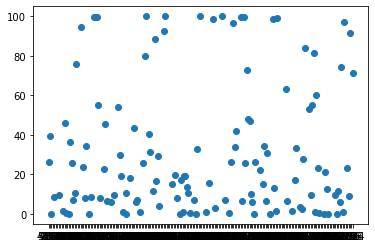

In [77]:
import matplotlib.pyplot as plt

gdp_compare.dropna

x = gdp_compare['GDP']
y = gdp_compare['percent_renewable']

plt.scatter(x, y)